# Random Forest
## Grado en Ingeniería Informática. Universidad de Burgos
**Autor:** Alicia Olivares Gil

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #matplotlib.pyplot como plot
import pickle as pk
import loadData as ld

## Leer datos:

In [2]:
with open('datos_normalizados.pkl','rb') as f: 
    datos = pk.load(f) 

print(len(datos))

124


In [3]:
with open('datos_estadisticos.pkl','rb') as f: 
    datos_estadisticos = pk.load(f) 

print(len(datos))

124


In [ ]:
#buscar días con ataque

indices=[]

for i in range(len(datos)): 
    for index, row in datos[i].iterrows(): 
        if(row['target'] == True): 
            indices.append(i)
            break; 

In [7]:
indices

[74, 109, 121]

In [4]:
diacrisis1 = datos[74]
diacrisis1.head()

,DateTime,P1,P2,P3,P4,P5,P6,target
3396348,2018-11-09 21:02:53,0.0,18.852459,22.131148,22.950820,13.934426,6.557377,False
3396346,2018-11-09 21:02:53,0.0,19.672131,22.950820,23.770492,13.934426,7.377049,False
3396345,2018-11-09 21:02:53,0.0,18.852459,22.131148,22.950820,13.934426,6.557377,False
3396347,2018-11-09 21:02:53,0.0,19.672131,22.950820,22.950820,13.934426,6.557377,False
3396349,2018-11-09 21:02:53,0.0,18.852459,22.131148,22.950820,13.934426,6.557377,False


In [5]:
diacrisis2 = datos[109]
diacrisis2.head()

,DateTime,P1,P2,P3,P4,P5,P6,target
5375569,2019-01-09 21:18:44,0.000000,13.114754,5.737705,0.000000,0.000000,0.0,False
5375570,2019-01-09 21:18:44,0.000000,22.950820,20.491803,11.475410,0.000000,0.0,False
5375568,2019-01-09 21:18:44,0.000000,21.311475,13.934426,4.098361,0.000000,0.0,False
5375566,2019-01-09 21:18:44,4.098361,27.049180,22.950820,12.295082,0.000000,0.0,False
5375565,2019-01-09 21:18:44,0.000000,27.049180,29.508197,24.590164,7.377049,0.0,False


In [6]:
diacrisis1_estadisticos = datos_estadisticos[74]
diacrisis1_estadisticos.head()

,DateTime,P1 mean 25,P2 mean 25,P3 mean 25,P4 mean 25,P5 mean 25,P6 mean 25,P1 std 25,P2 std 25,P3 std 25,P4 std 25,P5 std 25,P6 std 25,P1 range 25,P2 range 25,P3 range 25,P4 range 25,P5 range 25,P6 range 25,target
3396369,2018-11-09 21:03:08,3.549061,40.640223,47.807933,49.199722,29.297147,14.057063,11.659387,2.233533,2.324735,2.089279,2.154585,1.262380,10.169492,1.694915,1.694915,1.694915,3.389831,1.694915,False
3396370,2018-11-09 21:03:09,3.897008,40.709812,47.807933,49.199722,29.297147,14.057063,11.792337,2.279591,2.324735,2.089279,2.154585,1.262380,10.169492,1.694915,1.694915,1.694915,3.389831,1.694915,False
3396371,2018-11-09 21:03:10,4.244955,40.709812,47.738344,49.060543,29.227557,13.987474,11.850948,2.279591,2.309785,2.279591,2.279591,0.911836,10.169492,1.694915,1.694915,3.389831,3.389831,1.694915,False
3396372,2018-11-09 21:03:10,4.244955,40.640223,47.738344,49.060543,29.227557,13.987474,11.850948,2.233533,2.309785,2.279591,2.279591,0.911836,10.169492,1.694915,1.694915,3.389831,3.389831,1.694915,False
3396373,2018-11-09 21:03:11,4.244955,40.640223,47.668754,49.060543,29.227557,13.987474,11.850948,2.233533,2.279591,2.279591,2.279591,0.911836,10.169492,1.694915,1.694915,3.389831,3.389831,1.694915,False


In [7]:
diacrisis2_estadisticos = datos_estadisticos[109]
diacrisis2_estadisticos.head()

,DateTime,P1 mean 25,P2 mean 25,P3 mean 25,P4 mean 25,P5 mean 25,P6 mean 25,P1 std 25,P2 std 25,P3 std 25,P4 std 25,P5 std 25,P6 std 25,P1 range 25,P2 range 25,P3 range 25,P4 range 25,P5 range 25,P6 range 25,target
5375588,2019-01-09 21:18:59,0.445236,56.277827,54.140695,34.728406,2.493321,0.62333,4.195599,14.908651,29.035647,34.063682,17.354775,5.873839,9.259259,31.481481,75.925926,85.185185,35.185185,12.962963,False
5375589,2019-01-09 21:19:00,0.445236,56.544969,55.565450,36.420303,2.493321,0.62333,4.195599,12.586797,24.806128,31.159680,17.354775,5.873839,9.259259,20.370370,57.407407,75.925926,35.185185,12.962963,False
5375590,2019-01-09 21:19:00,0.445236,56.990205,55.654497,36.242208,2.493321,0.62333,4.195599,12.586797,24.791932,31.221760,17.354775,5.873839,9.259259,20.370370,57.407407,75.925926,35.185185,12.962963,False
5375591,2019-01-09 21:19:01,0.445236,56.277827,56.099733,37.488869,2.493321,0.62333,4.195599,12.732796,23.887910,29.535547,17.354775,5.873839,9.259259,20.370370,53.703704,66.666667,35.185185,12.962963,False
5375592,2019-01-09 21:19:02,0.000000,55.298308,55.654497,37.666963,2.493321,0.62333,0.000000,11.079348,23.826422,29.491808,17.354775,5.873839,0.000000,20.370370,53.703704,66.666667,35.185185,12.962963,False


# Clasificador Random Forest (supervisado)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics as mtr

## - Datos brutos: 

In [9]:
# generar particiones de entrenamiento y testeo 
X_train, X_test, y_train, y_test = train_test_split(diacrisis1[['P1','P2','P3','P4','P5','P6']] , 
                                                    diacrisis1['target'], 
                                                    stratify=diacrisis1['target'], 
                                                    test_size=0.3, random_state=0)

In [10]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Matriz de confusión (predecir mismo día): 

In [11]:
y_pred = rfc.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [12]:
confusion_matrix(y_test ,y_pred)

array([[36394,     0],
       [  200,     0]])

### Área bajo la curva (predecir mismo día): 

In [13]:
## predicción probabilistica 
y_pred = rfc.predict_proba(X_test)
y_pred

array([[9.99646092e-01, 3.53907526e-04],
       [9.99716086e-01, 2.83914159e-04],
       [9.99712764e-01, 2.87236486e-04],
       ...,
       [9.94685121e-01, 5.31487889e-03],
       [9.99723513e-01, 2.76486774e-04],
       [9.99712764e-01, 2.87236486e-04]])

In [18]:
y_score = [i[1] for i in y_pred]

0.9967777655657526


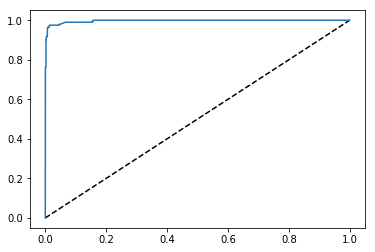

In [16]:
fpr, tpr, thr = mtr.roc_curve(y_test,y_score)
print(mtr.roc_auc_score(y_test,y_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

### Matriz de confusión (predecir día distinto): 

In [85]:
#intentando predecir un día distinto 
y_pred = rfc.predict(diacrisis2.drop(['DateTime','target'], axis=1))
y_pred

array([False, False, False, ..., False, False, False])

In [86]:
confusion_matrix(diacrisis2['target'].values ,y_pred)

array([[117602,      0],
       [  2249,      0]])

### Área bajo la curva (predecir día distinto): 

In [87]:
## predicción probabilistica 
y_pred = rfc.predict_proba(diacrisis2.drop(['DateTime','target'], axis=1))
y_pred

array([[9.99743711e-01, 2.56289113e-04],
       [9.99743711e-01, 2.56289113e-04],
       [9.99743711e-01, 2.56289113e-04],
       ...,
       [9.99743711e-01, 2.56289113e-04],
       [9.99743711e-01, 2.56289113e-04],
       [9.99743711e-01, 2.56289113e-04]])

In [88]:
y_score = [i[1] for i in y_pred]

0.638631547639082


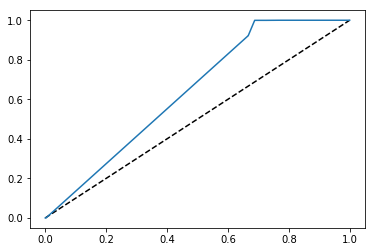

In [89]:
fpr, tpr, thr = mtr.roc_curve(diacrisis2['target'].values,y_score)
print(mtr.roc_auc_score(diacrisis2['target'].values,y_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

## - Datos estadisticos (media, desviación y rango, ventana=25): 

In [90]:
# generar particiones de entrenamiento y testeo 
X_train, X_test, y_train, y_test = train_test_split(diacrisis1_estadisticos.drop(['DateTime','target'], axis=1 ), diacrisis1_estadisticos['target'], test_size=0.3, random_state=0)

In [91]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Matriz de confusión (predecir mismo día):

In [92]:
y_pred = rfc.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [93]:
confusion_matrix(y_test ,y_pred)

array([[36384,     0],
       [   50,   153]])

### Matriz de confusión (predecir día distinto): 

In [94]:
#intentando predecir un día distinto 
y_pred = rfc.predict(diacrisis2_estadisticos.drop(['DateTime','target'], axis=1))
y_pred

array([False, False, False, ..., False, False, False])

In [95]:
confusion_matrix(diacrisis2_estadisticos['target'].values ,y_pred)

array([[117578,      0],
       [  2249,      0]])

### Área bajo la curva (predecir mismo día): 

In [96]:
## predicción probabilistica 
y_pred = rfc.predict_proba(X_test)
y_pred

array([[9.99606878e-01, 3.93121577e-04],
       [9.98672110e-01, 1.32789002e-03],
       [9.99624124e-01, 3.75876334e-04],
       ...,
       [9.98664905e-01, 1.33509518e-03],
       [9.99606878e-01, 3.93121577e-04],
       [9.99640252e-01, 3.59748374e-04]])

In [97]:
y_score = [i[1] for i in y_pred]

0.9983432738257708


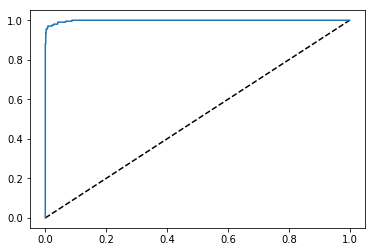

In [98]:
fpr, tpr, thr = mtr.roc_curve(y_test,y_score)
print(mtr.roc_auc_score(y_test,y_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

### Área bajo la curva (predecir día distinto): 

In [99]:
#intentando predecir un día distinto 
y_pred = rfc.predict_proba(diacrisis2_estadisticos.drop(['DateTime','target'], axis=1))
y_pred

array([[9.91628721e-01, 8.37127897e-03],
       [9.91628721e-01, 8.37127897e-03],
       [9.91628721e-01, 8.37127897e-03],
       ...,
       [9.99656217e-01, 3.43783076e-04],
       [9.99656217e-01, 3.43783076e-04],
       [9.99656217e-01, 3.43783076e-04]])

In [100]:
y_score = [i[1] for i in y_pred]

0.5519995804455846


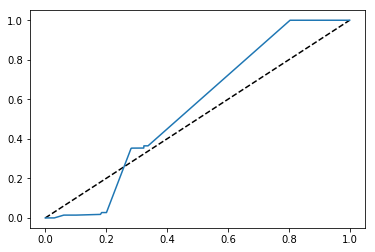

In [101]:
fpr, tpr, thr = mtr.roc_curve(diacrisis2_estadisticos['target'],y_score)
print(mtr.roc_auc_score(diacrisis2_estadisticos['target'],y_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)